# Pr√©diction de d√©part clients (Churn Prediction)

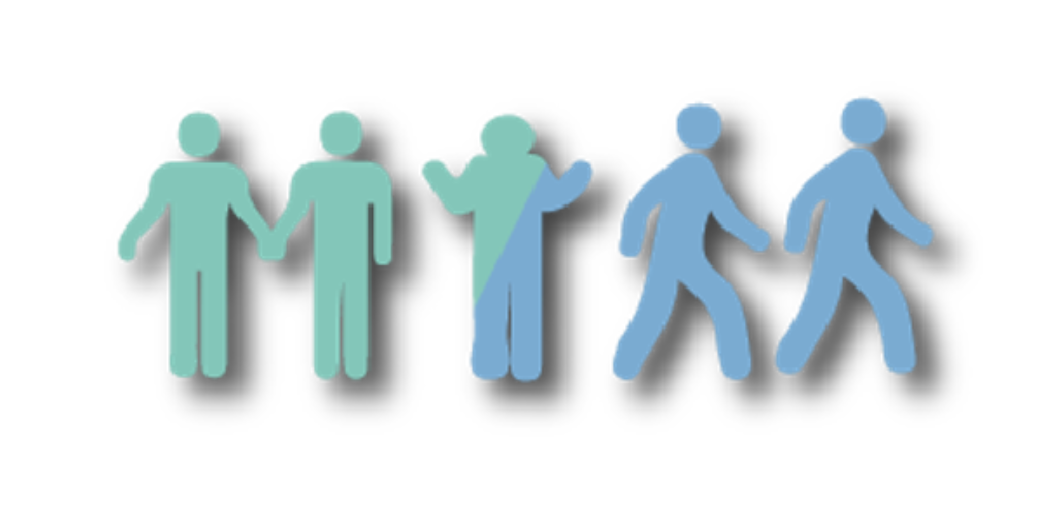

## *Saviez-vous qu'attirer d'un nouveau client co√ªte cinq fois plus cher que la fid√©lisation d'un client existant ?*

# Sommaire

- 1. Introduction
- 2. Chargement et nettoyage des donn√©es
- 3. Manipulation des donn√©es
- 4. Mod√©lisation
- 5. Conclusion

# 1. Introduction

Qu‚Äôest-ce que l‚Äôattrition client (que l'on va nommer 'Churn' tout au long du projet) ?

Le churn d√©signe la perte de clients ou d‚Äôabonn√©s, c‚Äôest-√†-dire lorsqu‚Äôils cessent de faire appel aux services ou produits d‚Äôune entreprise.

Dans le secteur des t√©l√©communications, les consommateurs ont un large choix de fournisseurs et peuvent facilement passer de l‚Äôun √† l‚Äôautre. Cette grande libert√© de mouvement complexifie les efforts de fid√©lisation, notamment parce que la majorit√© des entreprises op√®rent √† grande √©chelle, rendant difficile un accompagnement individualis√© de chaque client. Une telle approche serait trop co√ªteuse par rapport aux b√©n√©fices potentiels.

Cependant, si une entreprise est en mesure d‚Äôanticiper les d√©parts potentiels, elle peut concentrer ses efforts de fid√©lisation sur les clients les plus √† risque. Cette approche cibl√©e permet de maximiser l‚Äôimpact des actions de r√©tention, tout en optimisant les co√ªts. Dans ce contexte, la fid√©lisation devient un levier strat√©gique essentiel pour √©largir sa base client et renforcer sa position concurrentielle. Plus une entreprise parvient √† retenir ses clients, plus elle augmente sa rentabilit√© et r√©duit ses co√ªts d‚Äôacquisition.

Le taux d‚Äôattrition est donc un indicateur cl√© de performance. Il est en effet bien plus rentable de conserver un client existant que d‚Äôen conqu√©rir un nouveau.

Pour r√©duire ce taux, les entreprises doivent √™tre capables d‚Äôidentifier les signaux faibles annonciateurs d‚Äôun d√©part. Cela n√©cessite une vision 360¬∞ du client, int√©grant ses interactions sur l‚Äôensemble des canaux : visites en boutique, historique d‚Äôachats, appels au service client, navigation en ligne, activit√© sur les r√©seaux sociaux, etc.

En s‚Äôattaquant de mani√®re proactive √† l‚Äôattrition, les entreprises peuvent non seulement limiter leurs pertes, mais aussi renforcer durablement leur croissance. Plus leur base client est solide, plus leur mod√®le √©conomique devient performant. Ainsi, anticiper les d√©parts et mettre en place une strat√©gie de fid√©lisation efficace devient un enjeu central pour assurer leur p√©rennit√©.

# 2. Chargement et nettoyage des donn√©es

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import plotly.io as pio
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.drop_duplicates(inplace=True)

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check de valeurs manquantes
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

*11 valeurs manquantes dans la colonne TotalCharges.*

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df = df.reset_index(drop=True)

# 3. Manipulation des donn√©es

In [7]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

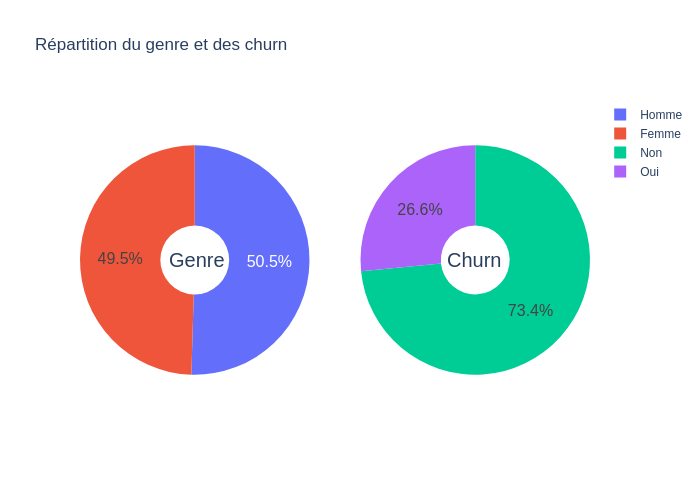

In [15]:
g_labels = ['Homme', 'Femme']
c_labels = ['Non', 'Oui']


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="R√©partition du genre et des churn",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Genre', x=0.17, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.83, y=0.5, font_size=20, showarrow=False)])


# üîΩ Enregistrer l‚Äôimage au format PNG
fig.write_image("repartition_genre_churn.png")

# üîΩ Afficher l‚Äôimage statique dans le notebook
Image("repartition_genre_churn.png")

*26,6 % des clients ont chang√© de marque.
Les clients sont √† 49,5 % des femmes et √† 50,5 % des hommes.*

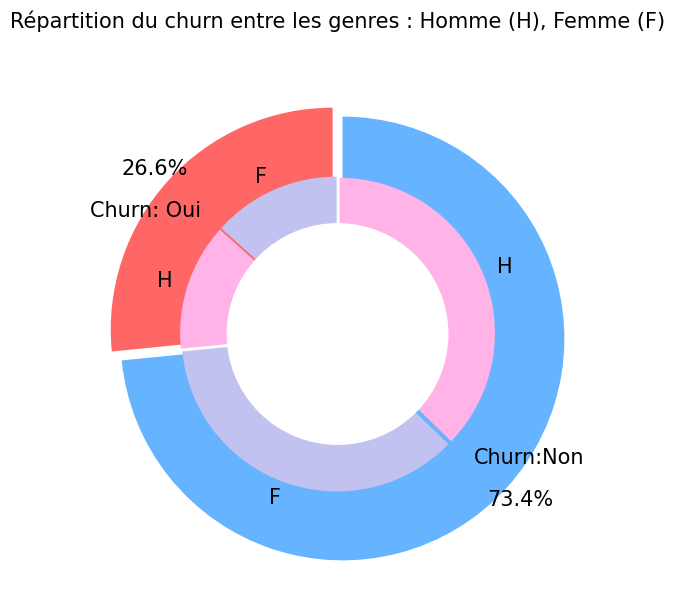

In [16]:
plt.figure(figsize=(6, 6))
labels =["Churn: Oui","Churn:Non"]
values = [1869,5163]
labels_gender = ["F","H","F","H"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )


centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('R√©partition du churn entre les genres : Homme (H), Femme (F)', fontsize=15, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()

On remarque une influence n√©gligeable du genre sur la propension √† churn ou non.

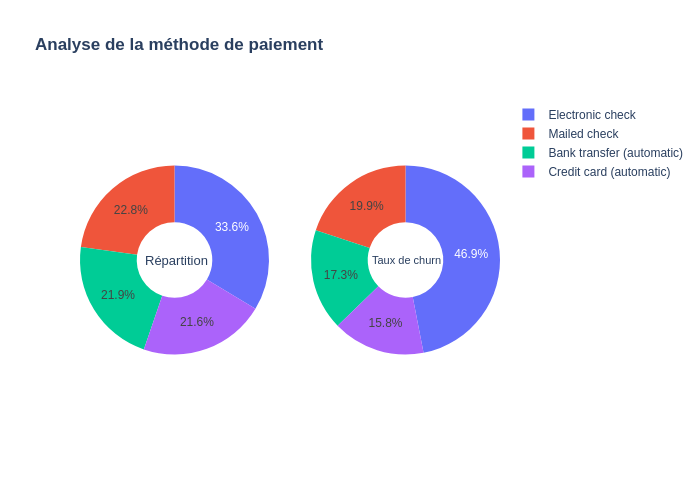

In [29]:
# Donn√©es pie 1 : distribution brute
labels_1 = df['PaymentMethod'].value_counts().index
values_1 = df['PaymentMethod'].value_counts().values

# Donn√©es pie 2 : churn ratio par m√©thode
churn_rate = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0)
labels_2 = churn_rate.index
values_2 = churn_rate['Yes']  # Taux de churn (exprim√© en %)

# Cr√©ation des 2 pie charts c√¥te √† c√¥te
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels_1, values=values_1, name="R√©partition", hole=0.4), 1, 1)
fig.add_trace(go.Pie(labels=labels_2, values=values_2, name="Taux de churn", hole=0.4), 1, 2)

# Titres
fig.update_layout(
    title_text="<b>Analyse de la m√©thode de paiement</b>",
    annotations=[
        dict(text='R√©partition', x=0.15, y=0.5, font_size=13, showarrow=False),
        dict(text='Taux de churn', x=0.865, y=0.5, font_size=11, showarrow=False)
    ]
)

fig.write_image("payment_method.png")
Image("payment_method.png")

#### *On remarque un taux de churn plus √©lev√© chez les personnes r√©glant en ch√®que √©lectronique.*

In [31]:
color_map = {
    'Yes': '#ff6666',
    'No': '#66b3ff'
}

fig = px.histogram(
    df,
    x="Churn",
    color="Contract",
    barmode="group",
    title="<b>R√©partition des contrats client<b>",
    color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)

fig.write_image("customer_contract.png")
Image("customer_contract.png")

#### *Les personnes ayant un contrat mensuel ont tendance √† churn plus souvent.*

In [32]:

df['InternetService_label'] = df['InternetService'].replace({
    'Fiber optic': 'Fibre optique',
    'DSL': 'DSL',
    'No': 'Pas d\'internet',
})

color_map = {
    'Yes': '#ff6666',
    'No': '#66b3ff'
}


fig = px.histogram(
    df,
    x="Churn",
    color="InternetService_label",
    barmode="group",
    title="<b>R√©partition des services internet<b>",
    color_discrete_map=color_map)
fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    legend_title_text="")

fig.write_image("internet_service.png")
Image("internet_service.png")

#### *De nombreux clients choisissent le service de fibre optique et il est int√©ressant de noter que ceux choisissant ce service ont un taux de d√©sabonnement tr√®s √©lev√©, cela sugg√®re une insatisfaction autour de ce service : un prix trop √©lev√© ? qualit√© ? saturation ?*
*Les clients qui b√©n√©ficient du service DSL sont majoritaires et ont un taux de d√©sabonnement inf√©rieur √† celui du service de fibre optique.*

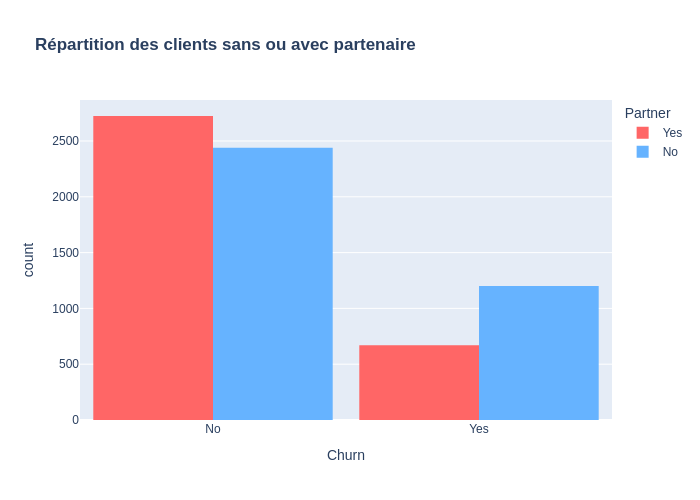

In [33]:
color_map = {
    'Yes': '#ff6666',
    'No': '#66b3ff'
}

fig = px.histogram(
    df,
    x="Churn",
    color="Partner",
    barmode="group",
    title="<b>R√©partition des clients sans ou avec partenaire<b>",
    color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)

fig.write_image("customer_partner.png")
Image("customer_partner.png")

#### *Les clients sans partenaires ont une propension plus √©lev√©e √† churn.*

In [34]:
color_map = {
    'Yes': '#ff6666',
    'No': '#66b3ff'
}

fig = px.histogram(
    df,
    x="Churn",
     color="OnlineSecurity",
    barmode="group",
    title="<b>R√©partition des clients sans ou avec une s√©curit√© en ligne<b>",
    color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)

fig.write_image("online_security.png")
Image("online_security.png")

#### *Les clients sans s√©curit√© ont tendance √† churn plus.*

In [35]:
color_map = {
    'Yes': '#ff6666',
    'No': '#66b3ff'
}

fig = px.histogram(
    df,
    x="Churn",
    color="TechSupport",
    barmode="group",
    title="<b>R√©partition des clients sans ou avec support technique<b>",
    color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)

fig.write_image("tech_support.png")
Image("tech_support.png")

#### *Pareillement pour les clients sans support technique : une tendance √† churn plus √©lev√©e est pr√©sente.*

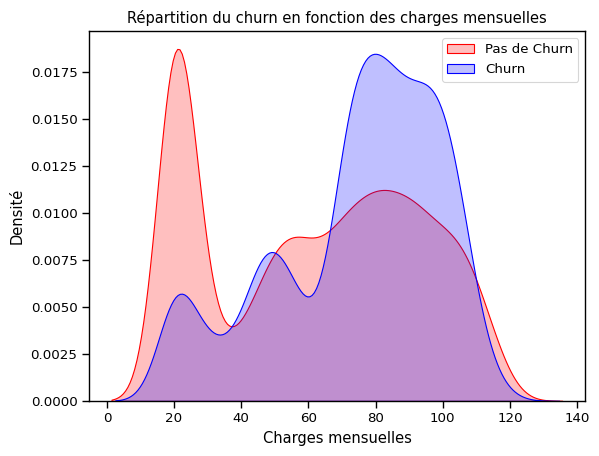

In [36]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Pas de Churn","Churn"],loc='upper right');
ax.set_ylabel('Densit√©');
ax.set_xlabel('Charges mensuelles');
ax.set_title('R√©partition du churn en fonction des charges mensuelles');

#### *Plus le prix est √©lev√© plus les clients ont tendance √† churn, ce graphique permet de visualiser ce ph√©nom√®ne et de le quantitifier.*

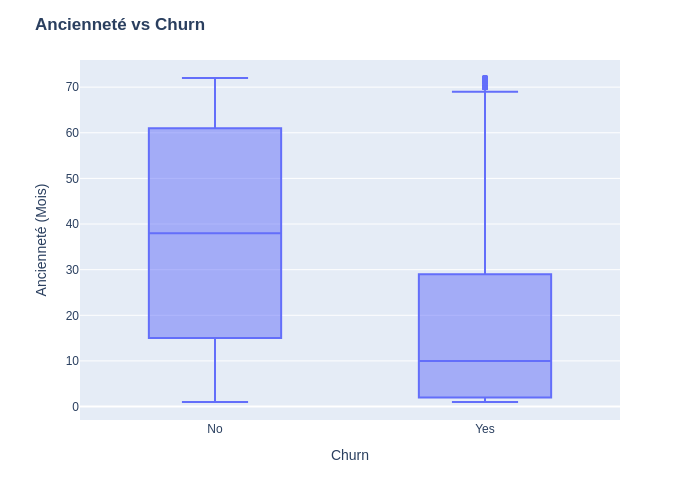

In [37]:
fig = px.box(df, x='Churn', y = 'tenure')


fig.update_yaxes(title_text='Anciennet√© (Mois)', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=1)


fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Anciennet√© vs Churn</b>',
)

fig.write_image("tenure_churn.png")
Image("tenure_churn.png")

# 4. Mod√©lisation

Dans cette section, nous allons entra√Æner un mod√®le de machine learning capable de pr√©dire la probabilit√© qu‚Äôun client r√©silie son abonnement (churn). L‚Äôobjectif est d‚Äôidentifier les clients √† risque afin d‚Äôanticiper et r√©duire les d√©parts.

Nous commencerons par un mod√®le de r√©gression logistique, puis testerons un mod√®le d‚Äôensemble plus puissant (Random Forest).

In [38]:
# Cible
y = df['Churn'].map({'Yes': 1, 'No': 0})

X = df.drop(['customerID', 'Churn'], axis=1)

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[917 116]
 [160 214]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



**R√©sultats :**

- Accuracy : 80%
- F1-score pour la classe churn : 0.59

Le mod√®le d√©tecte correctement une bonne partie des clients fid√®les (classe 0), mais a plus de difficult√© sur les churners (classe 1), avec un rappel de seulement 54%.

#### Testons le mod√®le RandomForest maintenant.

In [40]:
# Mod√®le
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Pr√©diction
y_pred_rf = rf_model.predict(X_test)

# √âvaluation
print(confusion_matrix(y_test, y_pred_rf))

[[924 109]
 [180 194]]


In [41]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



**R√©sultats :**

- Accuracy : 80%
- F1-score pour la classe churn : 0.55
- Le rappel sur la classe churn descend √† 0.47, l'ordre de grandeur est globalement similaire.

Le gain en performance est marginal ici, ce qui sugg√®re qu‚Äôun meilleur tuning ou des variables suppl√©mentaires pourraient √™tre n√©cessaires pour aller plus loin.

In [42]:
# D√©finir les param√®tres √† tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialiser le mod√®le
rf_base = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid,
                           scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)

# Entra√Ænement
grid_search.fit(X_train, y_train)

# Meilleurs param√®tres
print("Meilleurs hyperparam√®tres :", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs hyperparam√®tres : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [43]:
# R√©entra√Æner le mod√®le
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

best_rf_model.fit(X_train, y_train)

# Pr√©dictions
y_pred_best = best_rf_model.predict(X_test)

# √âvaluation
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[923 110]
 [184 190]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**R√©sultats apr√®s optimisation :**

- Accuracy : 80%
- F1-score classe churn : 0.55
- Meilleurs hyperparam√®tres : (tu peux les afficher ici)

Malgr√© l‚Äôoptimisation, le mod√®le reste limit√© dans sa capacit√© √† capturer les churners. Cela ouvre des pistes d‚Äôam√©lioration possibles.

### Importance des variables

Visualisons maintenant les 15 variables les plus importantes pour le mod√®le final. Cela nous aidera √† comprendre les facteurs cl√©s associ√©s √† la r√©siliation des clients.

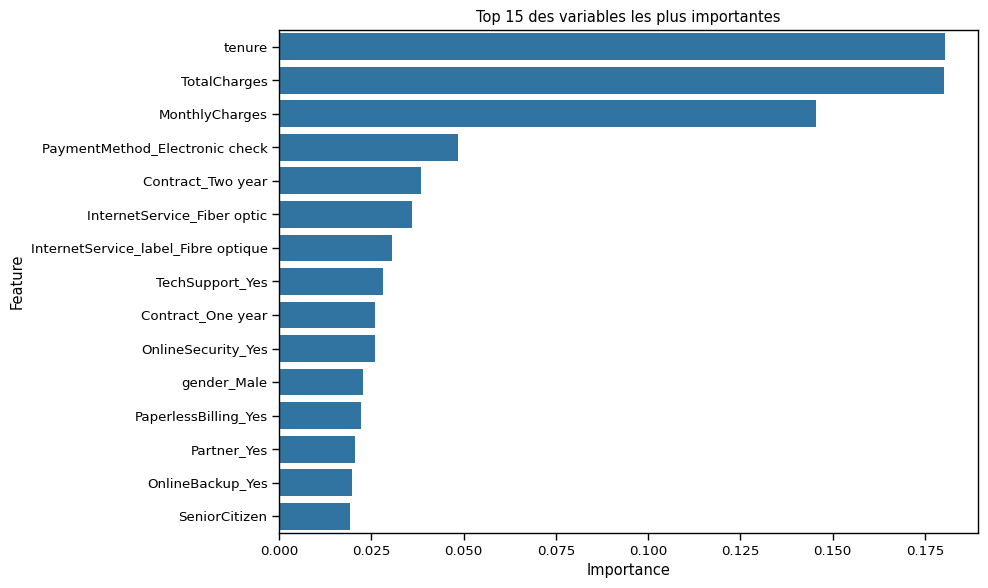

In [44]:
importances = best_rf_model.feature_importances_
features = X_encoded.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Affichage des 15 variables les plus importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title("Top 15 des variables les plus importantes")
plt.tight_layout()
plt.show()

**Variables influentes :**

- `tenure` (anciennet√©) est de loin la variable la plus importante.
- Suivent `MonthlyCharges`, `Contract_Two year`, ou encore le type de paiement.
- Certains services comme `OnlineSecurity`, `TechSupport` ou `InternetService` influencent aussi fortement la probabilit√© de churn.

Ces insights permettent d‚Äôorienter des actions marketing cibl√©es.

# 5. Conclusion

Dans ce projet, nous avons men√© une **analyse compl√®te du churn client** pour une entreprise de t√©l√©communications. L‚Äôobjectif √©tait d‚Äôidentifier les principaux facteurs influen√ßant le d√©part des clients, puis de construire un **mod√®le pr√©dictif** permettant d‚Äôanticiper ces d√©parts.

### Ce que nous avons appris
- Les clients les plus susceptibles de partir sont souvent ceux :
  - Sous **contrat mensuel**
  - Sans **s√©curit√© en ligne** ou **support technique**
  - Utilisant la **fibre optique**
  - Payant par **pr√©l√®vement √©lectronique**
- La variable la plus d√©terminante est la **dur√©e d‚Äôanciennet√© (`tenure`)**, suivie des **charges mensuelles**.

**Des d√©cisions marketing strat√©giques peuvent √™tre prises √† partir de ces insights.**

---

*Ce projet est un exemple de mission compl√®te.*